In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.io import wavfile

In [2]:
def YuleWalkerACoefs (x, window):
    r = []
    r.append (np.mean (x[0:] * x[0:]))
    for i in range (1, window+1):
        r.append (np.mean (x[0:-i] * x[i:]))

    R = np.transpose (r[1:])

    FI = ConstructMatrixFi (window, r)

    aCoefs = np.linalg.inv(FI) * R

    return aCoefs

def YuleWalkerACoefsInverse (x, aCoefs, window):
    xhad = [0 for i in range (1, len(x)+1)]

    for m in range (window, len(x)):
        a_temp = np.array ([])
        a_2 = 0
        for j in range (window):
            a_temp = (aCoefs[j] * x[m - j - 1])
            a_2 += a_temp
        xhad[m] = np.sum (a_2)

    return xhad

def ConstructMatrixFi (n, r):
    FI = np.zeros ((n, n))
    for i in range (n):
        for j in range (n):
            distance = abs (i - j)
            FI[i, j] = r[distance]
    return FI

def ClosestSquare (array):
    a = np.floor (np.sqrt (array.shape[0]))
    while array.shape[0] % a:
        a -= 1
    return (int(a), int(array.shape[0]/a))

def PrintImageArray (array):
    print ("shape: ", array.reshape (ClosestSquare (array)).shape)
    plt.imshow (array.reshape (ClosestSquare (array)))
    plt.colorbar ()
    plt.show ()

def PrintArray (array):
    plt.plot (array)
    plt.show ()

def WavAR (path: str, window: int = 2):

    sample_rate, data = wavfile.read (path)

    data_channels = []
    
    for dim in range (data.shape[1]):
        data_channels.append (data [:, dim])
    
    print (len (data_channels))

    wav_reconstructed_ch = []

    for channel in range (len (data_channels)):
        wav_reconstructed_ch.append (
            np.int16(YuleWalkerACoefsInverse (data_channels [channel], YuleWalkerACoefs (data_channels [channel], window), window))
            )

    wav_reconstructed = np.vstack ((chan for chan in wav_reconstructed_ch)).T
    wavfile.write ('wav_reconstructed.wav', sample_rate, np.int16(wav_reconstructed))

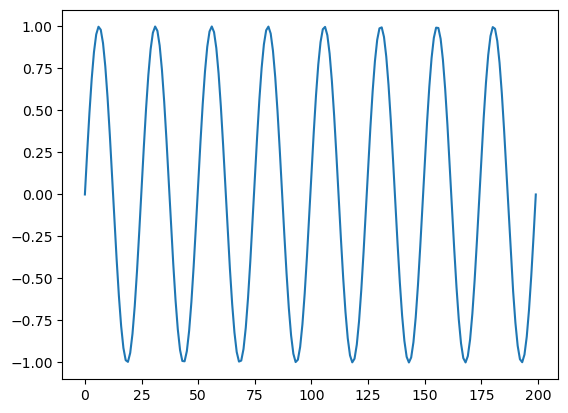

In [3]:
# n = np.arange (0, 100)
n = np.linspace (0, 4*np.pi, 200)

# x = (.5)**n + (.25)**n
# x = n**2
x = np.sin (n * 4)

PrintArray (x)

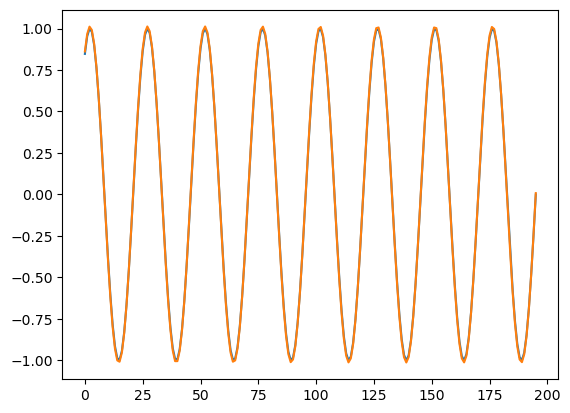

In [4]:
window = 4

xhad = YuleWalkerACoefsInverse (x, YuleWalkerACoefs (x, window), window)

plt.plot (x[window:])
plt.plot (xhad[window:])
plt.show ()

In [5]:
fs, data = wavfile.read ('file-example.wav')

C:\Users\PC\AppData\Local\Temp\ipykernel_16480\3184951727.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, data = wavfile.read ('file-example.wav')


In [6]:
print ('sample_rate: ', fs)

sample_rate:  44100


In [7]:
data.shape

(262094, 2)

In [8]:
data[:,0]

array([ 0,  0,  0, ..., -2,  0,  2], dtype=int16)

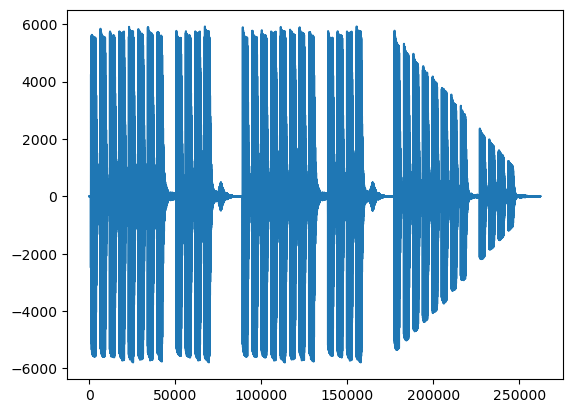

In [9]:
plt.plot (data[:, 0])

In [50]:
test = np.array ([[1, 2, 3], [4, 5, 6], [7, 8, 9], [1, 2, 3]])

print (test.shape)
print (test.shape[0])

for i in range ()

(4, 3)
4


C:\Users\PC\AppData\Local\Temp\ipykernel_16480\1953955942.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, data = wavfile.read (path)


2


C:\Users\PC\AppData\Local\Temp\ipykernel_16480\1953955942.py:19: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  wav_reconstructed = np.vstack ((chan for chan in wav_reconstructed_ch)).T


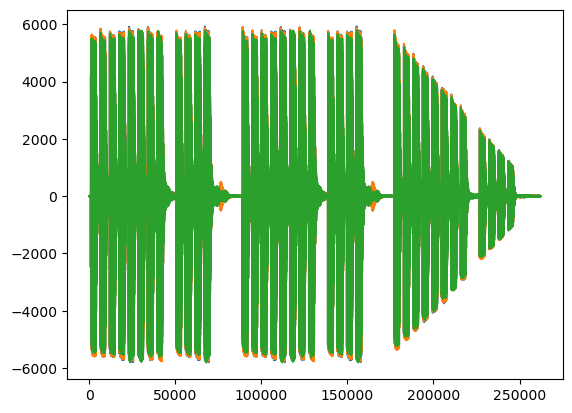

In [14]:
window = 4

wav_original_ch1 = data[:, 0]
wav_original_ch2 = data[:, 1]

wav_reconstructed_ch1 = np.int16(YuleWalkerACoefsInverse (wav_original_ch1, YuleWalkerACoefs (wav_original_ch1, window), window))
wav_reconstructed_ch2 = np.int16(YuleWalkerACoefsInverse (wav_original_ch2, YuleWalkerACoefs (wav_original_ch2, window), window))

plt.plot (wav_original_ch1[window:])
plt.plot (wav_reconstructed_ch1[window:])
plt.plot (wav_reconstructed_ch2[window:])
plt.show ()

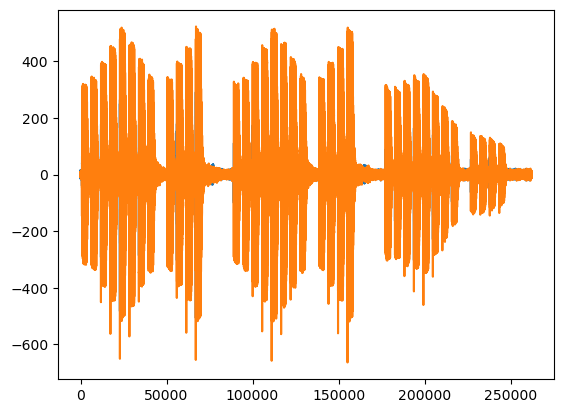

In [15]:
plt.plot (wav_original_ch1[window:] - wav_reconstructed_ch1[window:])
plt.plot (wav_original_ch2[window:] - wav_reconstructed_ch2[window:])
plt.show ()

In [12]:
type (wav_reconstructed_ch1)

numpy.ndarray

In [37]:
wav_reconstructed = np.vstack ((wav_reconstructed_ch1, wav_reconstructed_ch2)).T

wav_reconstructed.shape

(262094, 2)

In [38]:
wavfile.write ('wav_reconstructed.wav', fs, np.int16(wav_reconstructed))